### Q-learning method for Reinforcement Learning

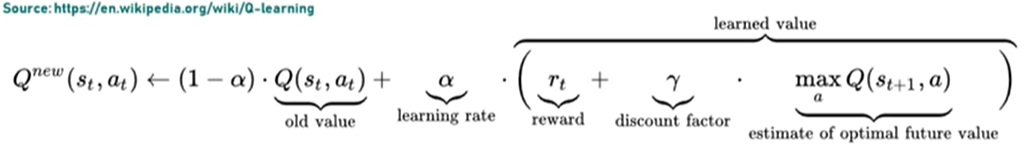

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='chesterish', grid = False)

Episode: 0 avg: -200.0 min: -200.0 max: -200.0
Episode: 200 avg: -200.0 min: -200.0 max: -200.0
Episode: 400 avg: -200.0 min: -200.0 max: -200.0
Episode: 600 avg: -200.0 min: -200.0 max: -200.0
Episode: 800 avg: -199.465 min: -200.0 max: -161.0
Episode: 1000 avg: -198.925 min: -200.0 max: -162.0
Episode: 1200 avg: -198.465 min: -200.0 max: -156.0
Episode: 1400 avg: -188.42 min: -200.0 max: -125.0
Episode: 1600 avg: -195.13 min: -200.0 max: -164.0
Episode: 1800 avg: -192.64 min: -200.0 max: -123.0
Episode: 2000 avg: -186.37 min: -200.0 max: -116.0
Episode: 2200 avg: -173.715 min: -200.0 max: -110.0
Episode: 2400 avg: -184.52 min: -200.0 max: -121.0
Episode: 2600 avg: -187.635 min: -200.0 max: -151.0
Episode: 2800 avg: -173.365 min: -200.0 max: -109.0


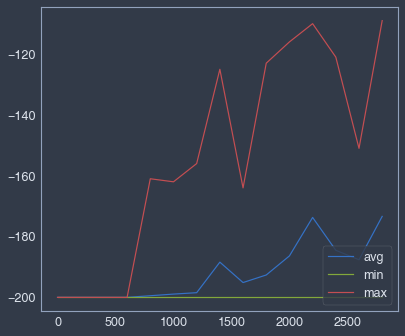

In [4]:
env = gym.make("MountainCar-v0")
env.reset()

LEARNING_RATE = 0.20 #how fast the ai learns
DISCOUNT = 0.90 #how much we value future reward over current rewards
EPISODES = 3000
SHOW_EVERY = 200

#Discretization Variables
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE

#Insert action randomizer to prevent model from sticking to one solution
epsilon = 0.5
START_EPSILON_DECAY = 1
END_EPSILON_DECAY = EPISODES//2
epsilon_decay_value = epsilon / (END_EPSILON_DECAY - START_EPSILON_DECAY)

#Collect episode rewards
ep_rewards = []
aggr_ep_rewards = { 'ep': [], 'avg': [], 'min': [], 'max': []}

#Initialize Q-table: for every combination, assign a Q-value per action. Perform the action with highest Q-value
q_table = np.random.uniform(low = -2, high = 0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

for episode in range(EPISODES):
    
    ep_reward = 0
    
    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False
    
    discrete_state = get_discrete_state(env.reset())
    
    done = False
    while not done:
        
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        #action = np.argmax(q_table[discrete_state])
        
        new_state, reward, done, _ = env.step(action)
        ep_reward += reward
        
        new_discrete_state = get_discrete_state(new_state)
        
        if render:
            env.render()
            
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1-LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state
    
    if END_EPSILON_DECAY >= episode >= START_EPSILON_DECAY:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(ep_reward)
    
    #Update Dictionary
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        
        print(f"Episode: {episode} avg: {average_reward} min: {min(ep_rewards[-SHOW_EVERY:])} max: {max(ep_rewards[-SHOW_EVERY:])}")
        
env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], Label="avg")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], Label="min")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], Label="max")
plt.legend(loc=4)
plt.show()

In [ ]:
'''
List of Questions:
    DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
    and DISCRETE_OS_SIZE + [env.action_space.n]
    - how does [ ] work?
    
    What is observation_space low and high?
'''